In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.api as sm 
import patsy

/Users/jinxin/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Homework Assignment \#1

*due Thursday, February 15, 2018 at 12.45pm*

### n.b.
All deliverables are required to be typed and all graphs and statistical output generated in Jupyter Notebook using Python and associated packages. Deliverables with *any* handwritten elements will not be accepted and will receive a grade of zero. 

You are required to upload a ```ipynb``` file to **Canvas** as the deliverable. Use the ```homeowrk_01.ipynb``` file as a template and write the answers in text and include relevant code below each question. 

### Question 1

In the SLR model, the probability distribution of $Y$ (i.e., $Y_i$) has the same mean and variance for all levels of $X$ (i.e., $X_i$). True or False? Explain.

**Answer:** False. The mean of the probability distribution of Y varies systematically with X. The reasoning is as follows:

- $Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$
- $E[Y_i] = E[\beta_0] + E[\beta_1 X_i] + E[\epsilon_i]$ 
- $E[Y_i] = \beta_0 + \beta_1 X_i$ (the expected value of the error term is zero)

Therefore, as $X_i$ increases by 1 unit, the mean of the probability distribution of Y changes by $\beta_1$.

The variance of the probability distribution of Y, on the other hand, has the same variance regardless of the values of X. The proof is as follows:

- $\sigma^2[Y_i] = \sigma^2[\beta_0 + \beta_1 X_i + \epsilon_i]$
- $\sigma^2[Y_i] = \sigma^2[\beta_0] + \sigma^2[\beta_1 X_i] + \sigma^2[\epsilon_i]$
- $\sigma^2[Y_i] = \sigma^2[\epsilon_i]$ (the first two terms on the RHS from last step have variance of 0 because $\beta_0$ and $\beta_1 X_i$ are constant) 
- $\sigma^2[Y_i] = \sigma^2$

### Question 2

The number of points above the fitted regression line is always equal to the number of points below it. True or False? Explain.

**Answer: ** False. Using the OLS approach, linear regression fits a regression line that minimize the sum of distances squared between the observed responses in the dataset, and the responses predicted by the regression model. It is not required that the number of points above and below the regression line is equal. For example, in the scatter plot below, there are clearly more points under the fitted regression line.

![title](http://scikit-learn.org/stable/_images/sphx_glr_plot_ols_001.png)

### Question 3

In a SLR model, what does $\beta_1$ measure?  

**Answer: ** $\beta_1$ measures on average, how much the response variable Y changes as the independent variable X increases by 1 unit.

### Question 4

In the context of an SLR model, prove the following:

- $E[Y_i] = \beta_0 + \beta_1 X_i$ 
- $V(Y_i) = \sigma^2 \hspace{5pt} \forall \hspace{5pt} i$ 

**Answer: ** Please see the answer to question 1.

### Question 5

For the SLR model, $Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$, how many random variables are there. Explain.

**Answer: ** In the equation, $\epsilon_i$ is a random error term that cannot be explained by the model, so it's a random variable. The constant term $\beta_0 + \beta_1 X_i$ is the systematic part of $Y_i$. As a result, $Y_i$ is also a random variable.

### Question 6

Write out the normal error regression model and its assumptions (in English and math).

**Answer: ** $Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$ 
1. $\epsilon_i$ $\tilde{}$ $N(0, \sigma^2)$. The error terms follows a normal distribution with a mean of zero and a variance of $\epsilon_i$. This has two implications:
    - $E[\epsilon_i | X_i] = 0$ or exogeneity, meaning the errors are not correlated with the independent variables
    - $\sigma^2[\epsilon_i | X_i] = \sigma^2$ - constant variance or homoscedasticity
2. The error terms are iid, aka independently and identically distributed, written as $\epsilon_i$ $\tilde{}$ $N(0, \sigma^2)$ $iid$. This implies that there is no serial correlation between $\epsilon_i$ and $\epsilon_j$ where $i \neq j$


### Question 7

What does a negative value of $\beta_1$ indicate about the relation between $X$ and $Y$?

**Answer: ** A negative value of $\beta_1$ indicates that there exists a negative correlation between X and Y. We can say on average as X increases by 1 unit Y drops by $\beta_1$.

### Question 8

***DO NOT USE ANY REGRESSION FUNCTIONS OR REGRESSION PACKAGES FOR THIS PROBLEM***

Using the following code

In [2]:
x = np.random.uniform(9, 27, 1000)
y = 0.5*x + np.random.uniform(-2, 2, 1000)
myData = pd.DataFrame(pd.concat([pd.Series(x), pd.Series(y)], axis = 1))
myData.rename(columns={0: "x", 1: "y"}, inplace = True)

manually compute the coefficients $b_0$ and $b_1$ for the SLR model.

$$ b_0 = \frac{1}{n} \Big( \sum Y_i - b_1 \sum X_i \Big) $$
$$ b_1 = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sum (X_i - \bar{X})^2}$$

In [3]:
n = len(x)
b1 = sum((x - x.mean()) * (y - y.mean())) / sum((x - x.mean())**2)
b0 = (y.sum() - b1 * x.sum()) / n

print ("b0 = %s and b1 = %s" % (round(b0, 4), round(b1, 4)))

b0 = 0.0173 and b1 = 0.4964


We can compare our calculations with the output from the statsmodels package.

In [4]:
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     4758.
Date:                Sun, 11 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:17:34   Log-Likelihood:                -1559.7
No. Observations:                1000   AIC:                             3123.
Df Residuals:                     998   BIC:                             3133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0173      0.134      0.129      0.8

### Question 9

Prove the equivalence of the $F$-Test and the $t$-Test on $\beta_1$ for an SLR model. 

**Answer:** F-statistics = $\frac{MSR}{MSE} = \frac{SSR}{MSE}$, because MSR = SSR.

SSR = $\sum_{i}^{n} (\hat{Y_i} - \bar{Y})^2  
    = \sum_{i}^{n} (b_0 + b_1X_i - \bar{Y})^2  
    = \sum_{i}^{n} (\bar{Y_i} - b_1\bar{X} + b_1X_i - \bar{Y})^2  
    = b_1^2\sum_{i}^{n} (X_i - \bar{X})^2$ 

Therefore, F-statistics = $\frac{b_1^2\sum_{i}^{n}(X_i - \bar{X})^2}{MSE}$  
(MSE = $\frac{SSE}{n - 2} = \frac{\sum_{i}^{n}(Y_i - \hat{Y_i})^2}{n - 2}$)

$t-score^2 = \frac{b_1^2}{s(b1)^2} = \frac{b_1^2}{\frac{MSE}{\sum_{i}^{n}(X_i - \bar{X})^2}} = \frac{b_1^2\sum_{i}^{n}(X_i - \bar{X})^2}{MSE}$

$t-score^2$ = F-statistics

Therefore, F-test and T-test are equivalent on $\beta_1$ for an SLR model.

### Question 10

Are hypotheses tested concerning the actual values of the coefficients, e.g., $\beta_1$, or their estimated values, e.g., $b_1$? Why?

**Answer: ** In linear regression, hypothesis testing is about whether the population coefficients (e.g. $\beta_1$) are statistically different from 0. However, the test statistic (e.g. t-score) is based on the estimated values of the coefficients (e.g. $b_1$).

### Question 11

You compute a coefficient of determination for a regression model an obtain an $R^2=0.832$. What does the strength of the coefficient of determination say about the causal relationship between the explanatory and response variables?

**Answer: ** $R^2$ = 0.832 means 83.2% of the variation of the response variable can be explain by the independent variables. While it indicates that there is a strong strength of the relationship between the explanatory and responsib variables, it doesn't imply any causal relationship between the two.

### Question 12

You compute a coefficient of determination for a regression model, regressing crime rate per capita ($Y$) on the size of municipal police force ($X$), obtaining an $R^2 = 0.6533$. What can you say about the relationship between $Y$ and $X$?

**Answer: ** $R^2$ = 0.6533 means 65.33% of the variation of crime rate per capita can be explained by the size of municipal police force, we can say there is a relatively strong relationship/correlation between the two.

### Question 13

From the discussion of SLR so far, how do you believe outliers will effect the regression line? 

**Answer:** Outliers can cause a fitted regression line to be significantly altered in an attempt to minimize the sums of squared errors (SSE), with the SSE for the singular outliers influencing the fitted regression line disproportionately.

### Question 14

Write out the hypothesis test which tests for the statistical significance of $\beta_1$ for an SLR model. Be sure to include the null an alternate hypothesis, the critical value including degrees of freedom (two-tailed test) for $\alpha = 0.05$ and an interpretation of both possible results. 

**Answer:** 
$H_0: \beta_1 = 0 \\
H_1: \beta_1 \neq 0$

The critical value for a t-test is computed using $t-score = \frac{b_1 - \beta_1}{s(b_1)} ~~ \tilde{} ~~ t_(n - 2)$ (the degrees of freedom is n - 2). 

For $\alpha =  0.05$, we compare the t-score (e.g. the critical value) with the threshold 1.69 or -1.69, if the t-score is greater than 1.69 or less than -1.69, then we have enough evidence to reject the null hypothesis and accept the alternatie hypothesis that states $\beta_1 \neq 0$. If the t-score falls within (-1.69, 1.69), then we don't have enough evidence to reject the null hypothesis.

### Question 15

Using ```modified_SENIC_data_01.csv```
1. Regress Infection Risk ($Y$) on Length of Stay ($X$). Report the $R^2$, $b_0$ and $b_1$  values.
2. Multiply the observations, both $X$ and $Y$, by 192; we will refer to these as $X_{(2)}$ and $Y_{(2)}$. Regress $Y_{(2)}$ on $X_{(2)}$. Report the $R^2$, $b_0$ and $b_1$  values.
3. Multiply only $Y$ by 47; we will refer to this as $Y_{(3)}$. Regress $Y_{(3)}$ on $X$. Report the $R^2$, $b_0$ and $b_1$  values.
4. Multiply only $X$ by 12; we will refer to this as $X_{(3)}$. Regress $Y$ on $X_{(3)}$. Report the $R^2$, $b_0$ and $b_1$  values.


**Succinctly** explain what you have gleaned from this exercise. Include a summarized tabular representation of the regression output and the associated $R^2$, $b_0$ and $b_1$ values.

In [5]:
senic_data = pd.read_csv('modified_SENIC_data_01.csv')
senic_data.head(5)

,lengthOfStay,age,infectionRisk
0,7.13,55.7,4.1
1,8.82,58.2,1.6
2,8.34,56.9,2.7
3,8.95,53.7,5.6
4,11.20,56.5,5.7


1.Regress Infection Risk ($Y$) on Length of Stay ($X$). Report the $R^2$, $b_0$ and $b_1$  values.

**Answer:** $R^2$, $b_0$ and $b_1$ are 0.285, 0.7443, and 0.3742 respectively.

In [6]:
X = sm.add_constant(senic_data['lengthOfStay'])
model = sm.OLS(senic_data['infectionRisk'], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          infectionRisk   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     44.15
Date:                Sun, 11 Feb 2018   Prob (F-statistic):           1.18e-09
Time:                        22:17:34   Log-Likelihood:                -174.07
No. Observations:                 113   AIC:                             352.1
Df Residuals:                     111   BIC:                             357.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7443      0.554      1.344   

2.Multiply the observations, both $X$ and $Y$, by 192; we will refer to these as $X_{(2)}$ and $Y_{(2)}$. Regress $Y_{(2)}$ on $X_{(2)}$. Report the $R^2$, $b_0$ and $b_1$  values.

**Answer:** $R^2$, $b_0$ and $b_1$ are 0.285, 142.9063, and 0.3742 respectively.

In [7]:
X = sm.add_constant(senic_data['lengthOfStay'] * 192)
model = sm.OLS(senic_data['infectionRisk'] * 192, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          infectionRisk   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     44.15
Date:                Sun, 11 Feb 2018   Prob (F-statistic):           1.18e-09
Time:                        22:17:34   Log-Likelihood:                -768.16
No. Observations:                 113   AIC:                             1540.
Df Residuals:                     111   BIC:                             1546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          142.9063    106.341      1.344   

3.Multiply only $Y$ by 47; we will refer to this as $Y_{(3)}$. Regress $Y_{(3)}$ on $X$. Report the $R^2$, $b_0$ and $b_1$  values.

**Answer:** $R^2$, $b_0$ and $b_1$ are 0.285, 34.9823, and 17.5882 respectively.

In [8]:
X = sm.add_constant(senic_data['lengthOfStay'])
model = sm.OLS(senic_data['infectionRisk'] * 47, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          infectionRisk   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     44.15
Date:                Sun, 11 Feb 2018   Prob (F-statistic):           1.18e-09
Time:                        22:17:34   Log-Likelihood:                -609.13
No. Observations:                 113   AIC:                             1222.
Df Residuals:                     111   BIC:                             1228.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           34.9823     26.031      1.344   

4.Multiply only $X$ by 12; we will refer to this as $X_{(3)}$. Regress $Y$ on $X_{(3)}$. Report the $R^2$, $b_0$ and $b_1$  values.

**Answer:** $R^2$, $b_0$ and $b_1$ are 0.285, 0.7443, and 0.0312 respectively.

In [9]:
X = sm.add_constant(senic_data['lengthOfStay'] * 12)
model = sm.OLS(senic_data['infectionRisk'], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          infectionRisk   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     44.15
Date:                Sun, 11 Feb 2018   Prob (F-statistic):           1.18e-09
Time:                        22:17:34   Log-Likelihood:                -174.07
No. Observations:                 113   AIC:                             352.1
Df Residuals:                     111   BIC:                             357.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7443      0.554      1.344   

**Summary:** From the table below, we have the following observations:
1. $R^2$ remains the same regardless of how we scale X and Y
2. Scaling X and Y by the same number will change $b_0$ but not $b_1$
3. Scaling only Y changes $b_1$ but not $b_0$
4. Scaling only X changes $b_0$ but not $b_1$

In [14]:
output = np.array([[0.285, 0.7443, 0.3742, 'original data'],
[0.285, 142.9063, 0.3742, 'multiply X and Y by 192'],
[0.285, 34.9823, 17.5882, 'multiply Y by 47'],
[0.285, 0.7443, 0.031, 'multiply X by 12']])

output_df = pd.DataFrame(output, columns=['R2', 'b0', 'b1', 'data transformation'])
output_df

,R2,b0,b1,data transformation
0,0.285,0.7443,0.3742,original data
1,0.285,142.9063,0.3742,multiply X and Y by 192
2,0.285,34.9823,17.5882,multiply Y by 47
3,0.285,0.7443,0.031,multiply X by 12


### Question 16

Using the ```fourDataSets.csv```, regress $Y$ on $X$ for $i=1,2,3,4$, i.e., generate four separate SLR models. **For each** of the four data sets, run and report summary statistics, generate a scatter plot and run a SLR model, reporting the regression function $R^2$, $R_a^2$, and the significance of $b_1$ ($p$-value). Intelligently discuss what you observe about each data set and the data sets as a whole.

In [11]:
fourdata = pd.read_csv('fourDataSets.csv')
fourdata.head(5)

,dataSet,x,y
0,1,10,8.04
1,1,8,6.95
2,1,13,7.58
3,1,9,8.81
4,1,11,8.33


First, let's check out the summary statistics and the scatter plot for each data set.

Data set 1
       dataSet          x          y
count     11.0  11.000000  11.000000
mean       1.0   9.000000   7.500909
std        0.0   3.316625   2.031568
min        1.0   4.000000   4.260000
25%        1.0   6.500000   6.315000
50%        1.0   9.000000   7.580000
75%        1.0  11.500000   8.570000
max        1.0  14.000000  10.840000


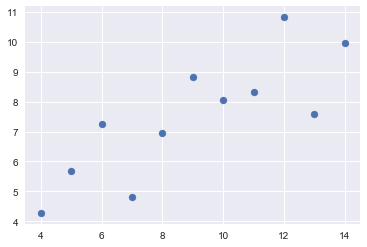


Data set 2
       dataSet          x          y
count     11.0  11.000000  11.000000
mean       2.0   9.000000   7.500909
std        0.0   3.316625   2.031657
min        2.0   4.000000   3.100000
25%        2.0   6.500000   6.695000
50%        2.0   9.000000   8.140000
75%        2.0  11.500000   8.950000
max        2.0  14.000000   9.260000


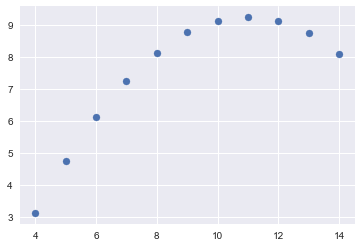


Data set 3
       dataSet          x          y
count     11.0  11.000000  11.000000
mean       3.0   9.000000   7.500000
std        0.0   3.316625   2.030424
min        3.0   4.000000   5.390000
25%        3.0   6.500000   6.250000
50%        3.0   9.000000   7.110000
75%        3.0  11.500000   7.980000
max        3.0  14.000000  12.740000


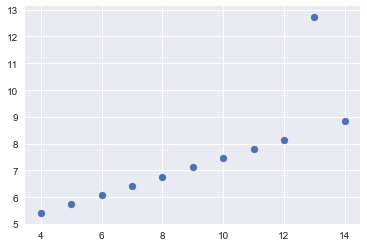


Data set 4
       dataSet          x          y
count     11.0  11.000000  11.000000
mean       4.0   9.000000   7.500909
std        0.0   3.316625   2.030579
min        4.0   8.000000   5.250000
25%        4.0   8.000000   6.170000
50%        4.0   8.000000   7.040000
75%        4.0   8.000000   8.190000
max        4.0  19.000000  12.500000


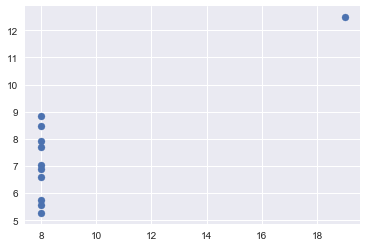

In [12]:
for i in range(1, 5):
    print "Data set " + str(i)
    temp = fourdata.loc[fourdata['dataSet'] == i, ] 
    print temp.describe()
    
    plt.scatter(temp['x'], temp['y'])
    plt.show()
    
    print ""

In [16]:
for i in range(0, 5):
    if i == 0:
        print 'Whole data set'
        X = sm.add_constant(fourdata['x'])
        model = sm.OLS(fourdata['y'], X)
        results = model.fit()
    else: 
        print "Data set " + str(i)
        temp = fourdata.loc[fourdata['dataSet'] == i, ]
        X = sm.add_constant(temp['x'])
        model = sm.OLS(temp['y'], X)
        results = model.fit()

    print 'regression function: y = ' + str(round(results.params['const'], 3)) + ' * b0 + ' + \
    str(round(results.params['x'], 3)) + ' * b1'
    print "R-squared, adjusted R-squared, and p-value of b1 are %s, %s, and %s respectively" % \
            (round(results.rsquared, 3), round(results.rsquared_adj, 3), round(results.pvalues['x'], 3))
    print ''

Whole data set
regression function: y = 3.001 * b0 + 0.5 * b1
R-squared, adjusted R-squared, and p-value of b1 are 0.666, 0.659, and 0.0 respectively

Data set 1
regression function: y = 3.0 * b0 + 0.5 * b1
R-squared, adjusted R-squared, and p-value of b1 are 0.667, 0.629, and 0.002 respectively

Data set 2
regression function: y = 3.001 * b0 + 0.5 * b1
R-squared, adjusted R-squared, and p-value of b1 are 0.666, 0.629, and 0.002 respectively

Data set 3
regression function: y = 3.002 * b0 + 0.5 * b1
R-squared, adjusted R-squared, and p-value of b1 are 0.666, 0.629, and 0.002 respectively

Data set 4
regression function: y = 3.002 * b0 + 0.5 * b1
R-squared, adjusted R-squared, and p-value of b1 are 0.667, 0.63, and 0.002 respectively



**Summary:** From the scatter plots, summary statistics, and regression results, we have the following observations:
1. Each data set has its unique scatter plot. Data set 1, data set 3, and data set 4 show a linear relationship between x and y, especially for data set 3 and 4 the relationship is almost perfectly linear except for one point. For data set 2, the relationship between x and y is quadratic
2. Regarding summary statistics, all four data sets have the same mean and standard deviation for both x and y
3. As for regression results, all four data sets have almost the same regression function, p-value of b1, R-squared, and adjusted R-squared. When running the regression on the entire data set, the result is also similar

We should keep in mind that even when the underlying relationship between x and y looks rather different for each data set, they can still have very similar summary statistics and regression results. There are several possible explanations for this, including the influence of outliers (data set 3 and 4) and the inappropriately modeled relationship (data set 2). In practice, it's recommended to use a mix of plots and summary statistics to get a good sense of the relationship between the response and the independent variables. Then we can proceed to fit the data with a proper model.